## Submitted by : S. Bhuvanesh
### Roll No :2018113002

# Tutorial-2 

Computing integrals (numerically) is an important task in many computational fields. In this tutorial we will explore two schemes: 
- finite difference schemes / grid schemes
- Monte Carlo scheme

Scipy has 'integrate' function: we will learn its usage.

# Grid schemes
Typically used for 1/2 dimensional integrals, by evaluating the value of the function on a regular grid and then using approximation schemes like 'trapezoidal rule'

# Task-1
- Write a function that takes as input a *function* and interval, and returns the value of the integral. Assume the fuction to be one-dimensional function
- Using the above function, find the area of a unit circle

In [1]:
%matplotlib notebook
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def calcarea(fn,lim1,lim2,N):
    h = (lim2 - lim1)/N
    x = np.arange(lim1,lim2,h)
    area = 0
    
    area = area + ((fn(lim1) + fn(lim2))*h)/2
    #print("x",x)
    for i in x:
        area = area + fn(i)*h
        #print("Adding ", fn(i)*h)
    return area 

In [3]:
def fn(x):
    r=1
    return 2* math.sqrt(r*r-x*x)
    

In [75]:
#Area of a Unit circle:
calcarea(fn,-1,1,100000)

3.14159254840372

# Task-2
Exploratory task: Adaptive grid size. When the function changes 'too fast', then more grid points; compute area using trapizoidal rule



In [64]:
def adaptive_integ(fn2,lim1,lim2,defh):
    calls = 0
    h = defh
    x = lim1
    area = 0 
    while x < lim2 :
        h = defh
        
        while x + h > lim2 :
            h= h/10
        der =  (fn2(x+h)-fn2(x))/h
        calls += 2
        h = defh/(1+abs(der))
        area = area + fn(x)*h
        calls += 1
        x = x+h
        
    return area, calls
    
    

In [65]:
def fn2(x):
    r=1
    return 2* math.sqrt(r*r-x*x)

In [68]:
adaptive_integ(fn2,-1.0,1.0,0.01)

(3.141473329119187, 1776)

### Plotting Error Percentage vs Number of Calls for Adaptive $\Delta h$ Integration 

<IPython.core.display.Javascript object>


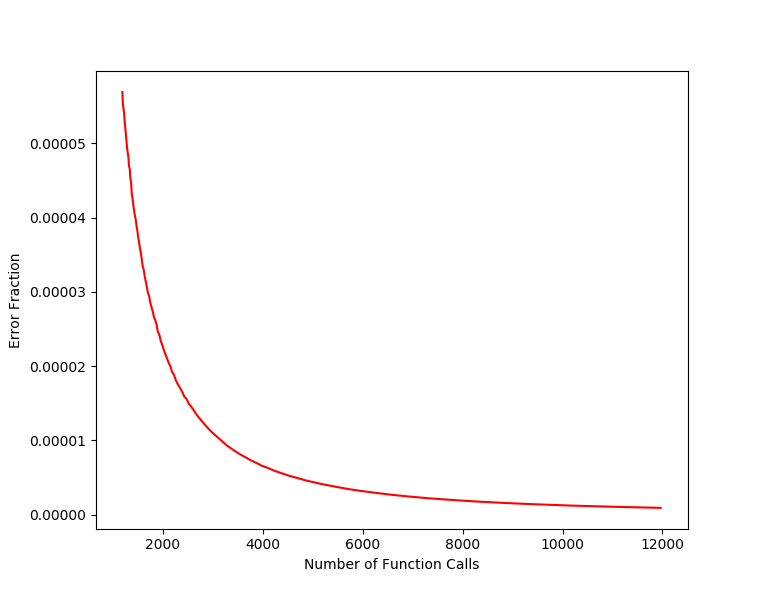

In [109]:
def plot_adapt():
    arr = np.linspace(0.001,0.010,100)
    x_ax = []
    y_ax = []
    for i in arr:
        temp = adaptive_integ(fn3,-1.0,1.0,i)
        x_ax = np.append(x_ax,temp[1])
        y_ax = np.append(y_ax,abs(temp[0]-np.pi)/np.pi)
    plt.plot(x_ax,y_ax,c='r')
    plt.xlabel("Number of Function Calls")
    plt.ylabel("Error Fraction")
    plt.show()
plot_adapt()

        
    

### Plotting Error Percentage vs Number of Function calls for Iterative Solution.

<IPython.core.display.Javascript object>


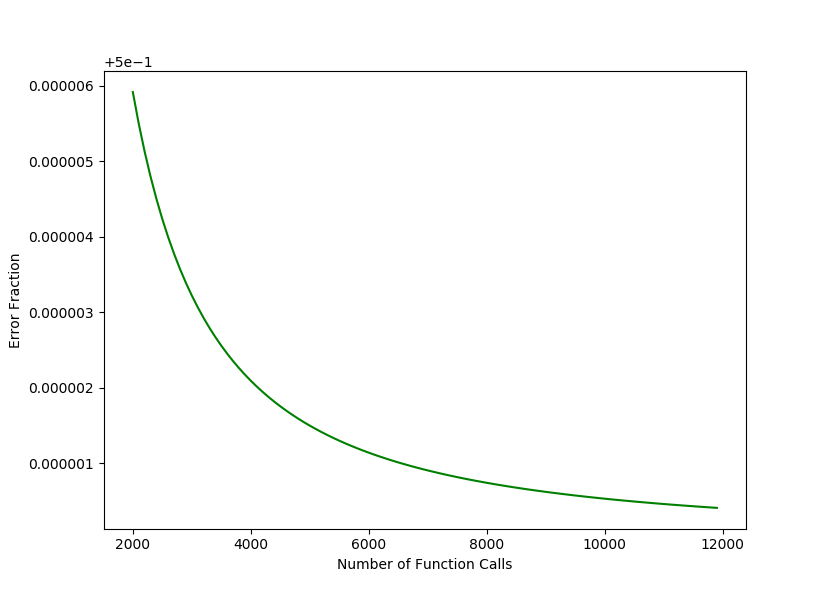

In [110]:
def plot_iterative():
    x_ax2 = [] 
    y_ax2 = []
    for i in range(2000,12000,100):
        x_ax2 = np.append(x_ax2,i)
        y_ax2 = np.append(y_ax2,abs(calcarea(fn3,-1,1,i)-np.pi)/np.pi)
    plt.plot(x_ax2,y_ax2,c='g')
    plt.xlabel("Number of Function Calls")
    plt.ylabel("Error Fraction")
   #print(x_ax2)
    plt.show()
        #print(x_ax)
plot_iterative()

### Cleary , The adaptive solution is more accurate than plain iterative solution for a given number of function calls. 

# Task-3
Monte Carlo methods are typically used when we have very large dimensional integrals.

Compute the area of the quarter unit circle (1st quadrant) using Monte Carlo method

In [21]:
def fn3(x):
    r = 1
    if x<-1 or x>1 :
        return 0
    else:
        return math.sqrt(r*r-x*x)
def check_inside(x,y):
    if fn3(x) >= y:
        return 1
    else:
        return 0

In [10]:
def monte(it):
    count_in = 0
    count_out = 0
    for i in range(it):
        if(check_inside( np.random.random(), np.random.random()) == 1):
            count_in = count_in + 1
        else :
            count_out = count_out + 1
    return ((4 * count_in)/i)

In [11]:
monte(1000000)

3.143387143387143

<IPython.core.display.Javascript object>


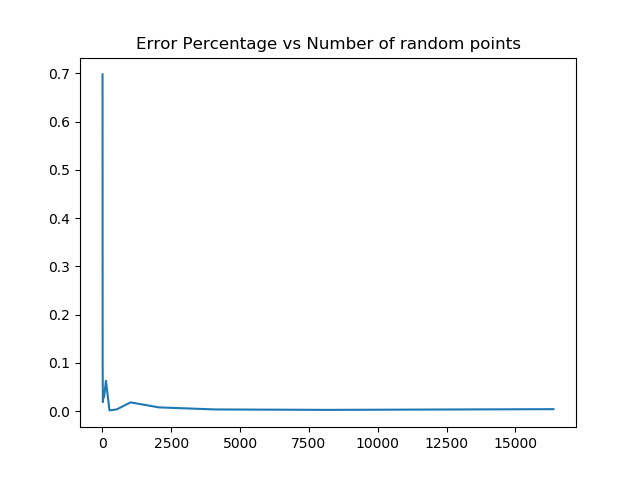

In [107]:

x_ax = []
y_ax = []
for i in range(2,15):
    x_ax = np.append(x_ax, 2**i)
    y_ax = np.append(y_ax , abs(np.pi-monte(2**i))/np.pi)
plt.plot(x_ax,y_ax)
plt.title("Error Percentage vs Number of random points")

plt.show()

In [13]:
def monte2(it):
    mysum = 0
    for i in range(it):
        mysum = mysum + fn3(np.random.random())
    avg = mysum / it 
    return 4 * avg
    
    

In [14]:
monte2(10000)

3.1503379579712836

### Importance Sampling Using normal distribution

3.1775203166159818


<IPython.core.display.Javascript object>


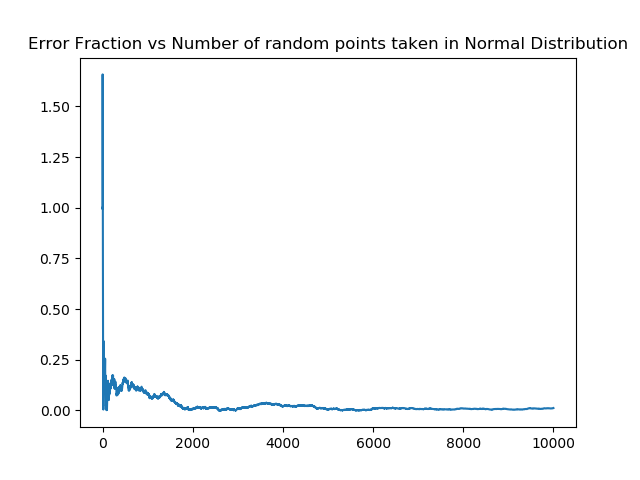

Text(0.5, 1.0, 'Error Fraction vs Number of random points taken in Normal Distribution')

In [108]:
it = 10000
nor_rand = np.random.normal(0,2.5,size=it)
new_sum = 0
y_ax2 = []

def compensate(x,sd):
    return ((1/(sd*np.sqrt(2*np.pi))) * np.exp(-np.power(x,2)/np.power(sd,2)))
    
for i in range(1,it):
    new_sum = new_sum + fn3(nor_rand[i])/compensate(nor_rand[i],2.5)
    y_ax2 = np.append(y_ax2, abs(2*new_sum/i - np.pi)/np.pi )
print(2*new_sum/it)
plt.plot(range(1,it),y_ax2)
plt.title("Error Fraction vs Number of random points taken in Normal Distribution")
    
    